<a href="https://colab.research.google.com/github/lucastrschneider/MAP3121/blob/main/Zeros_de_Fun%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de Newton-Rhapsody

In [1]:
import math

In [2]:
class NewtonRhaphson:
  def __init__(self, f, f_dot, start_point, epsilon_x=1e-5, epsilon_y=None, i_max=None, print_iteration=True):
    self.f = f
    self.f_dot = f_dot
    self.epsilon_x = epsilon_x
    self.epsilon_y = epsilon_y
    self.i_max = i_max
    self.print_iteration = print_iteration

    self.p_i = start_point

    self.i = 0

  def iterate_once(self):
    last_p_i = self.p_i
    self.p_i = self.p_i - (self.f(self.p_i) / self.f_dot(self.p_i))
    self.i += 1

    x_variation = abs(self.p_i - last_p_i)
    y_error = self.f(self.p_i)
    stop_condition = (False, False)

    if self.epsilon_x:
      if x_variation < self.epsilon_x:
        stop_condition = (True, stop_condition[1])

    if self.epsilon_y:
      if y_error < self.epsilon_y:
        stop_condition = (stop_condition[0], True)


    if self.print_iteration:
      print(f'Iteração {self.i}\np = {self.p_i}\nf(p) = {y_error}\nVariação em p = {x_variation}\n')

    return stop_condition

  def iterate(self):
    print(f'Começando o método com p_0 = {self.p_i}\n-------')
    running = True
    
    while(running):
      x_condition, y_condition = self.iterate_once()

      if x_condition:
        print(f'A variação em p foi menor que {self.epsilon_x}\n')
        running = False

      if y_condition:
        print(f'O erro de f(p) foi menor que {self.epsilon_y}\n')
        running = False

      if self.i >= self.i_max:
        print(f'Excedeu o número máximo de iterações ({self.i})\n')
        running = False

    print('-------')
    print(f'p = {self.p_i}')

In [3]:
class SecantMethod:
  def __init__(self, f, p_0, p_1, epsilon_x=1e-5, epsilon_y=None, i_max=None, print_iteration=True):
    self.f = f
    self.epsilon_x = epsilon_x
    self.epsilon_y = epsilon_y
    self.i_max = i_max
    self.print_iteration = print_iteration

    self.p_im1 = p_0
    self.p_i = p_1

    self.i = 1

  def iterate_once(self):
    last_p_i = self.p_i
    self.p_i = self.p_i - (self.f(self.p_i) * (self.p_im1 - self.p_i) / (self.f(self.p_im1) - self.f(self.p_i)))
    self.p_im1 = last_p_i
    self.i += 1

    x_variation = abs(self.p_i - last_p_i)
    y_error = self.f(self.p_i)
    stop_condition = (False, False)

    if self.epsilon_x:
      if x_variation < self.epsilon_x:
        stop_condition = (True, stop_condition[1])

    if self.epsilon_y:
      if y_error < self.epsilon_y:
        stop_condition = (stop_condition[0], True)


    if self.print_iteration:
      print(f'Iteração {self.i}\np = {self.p_i}\nf(p) = {y_error}\nVariação em p = {x_variation}\n')

    return stop_condition

  def iterate(self):
    print(f'Começando o método com:\np_0 = {self.p_im1}\np_1 = {self.p_i}')
    print('-------')
    running = True
    
    while(running):
      x_condition, y_condition = self.iterate_once()

      if x_condition:
        print(f'A variação em p foi menor que {self.epsilon_x}\n')
        running = False

      if y_condition:
        print(f'O erro de f(p) foi menor que {self.epsilon_y}\n')
        running = False

      if self.i >= self.i_max:
        print(f'Excedeu o número máximo de iterações ({self.i})\n')
        running = False

    print('-------')
    print(f'p = {self.p_i}')

## Testes

Teste com a função 1/x - π

A raíz da função deve aproximar o valor de 1/π

In [ ]:
def my_func(x):
  return 1/x - math.pi

def my_func_dot(x):
  return -1/(x**2)

In [ ]:
solver = NewtonRhaphson(my_func, my_func_dot, 0.1,
                        None, None, 6)

solver.iterate()

Começando o método com p_0 = 0.1
-------
Iteração 1
p = 0.1685840734641021
f(p) = 2.790165782730929
Variação em p = 0.06858407346410209

Iteração 2
p = 0.24788223072093987
f(p) = 0.89258114374777
Variação em p = 0.07929815725683778

Iteração 3
p = 0.3027274149213992
f(p) = 0.16170909811856182
Variação em p = 0.054845184200459335

Iteração 4
p = 0.3175470653567207
f(p) = 0.007546825550524883
Variação em p = 0.014819650435321519

Iteração 5
p = 0.31830805810480395
f(p) = 1.8042520032679477e-05
Variação em p = 0.0007609927480832224

Iteração 6
p = 0.31830988617329187
f(p) = 1.0361933533431511e-10
Variação em p = 1.8280684879190545e-06

Excedeu o número máximo de iterações (6)

-------
p = 0.31830988617329187


Teste com a função f(x) = x² - 2

In [ ]:
def my_func(x):
  return x**2 - 2

def my_func_dot(x):
  return 2*x

In [ ]:
solver = NewtonRhaphson(my_func, my_func_dot, 5,
                        None, None, 5)

solver.iterate()

Começando o método com p_0 = 5
-------
Iteração 1
p = 2.7
f(p) = 5.290000000000001
Variação em p = 2.3

Iteração 2
p = 1.7203703703703703
f(p) = 0.9596742112482852
Variação em p = 0.9796296296296299

Iteração 3
p = 1.44145536817765
f(p) = 0.0777935784481647
Variação em p = 0.27891500219272025

Iteração 4
p = 1.414470981367771
f(p) = 0.0007281571315052027
Variação em p = 0.026984386809879135

Iteração 5
p = 1.4142135857968836
f(p) = 6.625247950253765e-08
Variação em p = 0.000257395570887331

Excedeu o número máximo de iterações (5)

-------
p = 1.4142135857968836


In [ ]:
solver = SecantMethod(my_func, 5, 2.7,
                        None, None, 5)

solver.iterate()

Começando o método com:
p_0 = 5
p_1 = 2.7
-------
Iteração 2
p = 2.012987012987013
f(p) = 2.0521167144543773
Variação em p = 0.6870129870129871

Iteração 3
p = 1.5775695783962524
f(p) = 0.4887257746813298
Variação em p = 0.43541743459076065

Iteração 4
p = 1.44145536817765
f(p) = 0.0777935784481647
Variação em p = 0.13611421021860237

Iteração 5
p = 1.4156875855906106
f(p) = 0.004171339995372225
Variação em p = 0.02576778258703949

Excedeu o número máximo de iterações (5)

-------
p = 1.4156875855906106


## Exercícios do teste

3)

In [ ]:
def f_x(x):
  return 125 * x**3 + (225) * x**2 - (240) * x - 198

def f_x_dot(x):
  return 375*x**2 + 450*x - 240

In [ ]:
solver = NewtonRhaphson(f_x, f_x_dot, 39/100,
                        None, None, 5)

solver.iterate()

4)

In [4]:
def intersection_height(L, x, y):
  # print(L)
  hx = math.sqrt(x**2 - L**2)
  hy = math.sqrt(y**2 - L**2)
  return hx * hy / (hx + hy)

In [9]:
length_x = 9
length_y = 12
target_height = 2

step = 0.1

def my_func(x):
  return intersection_height(x, length_x, length_y) - target_height


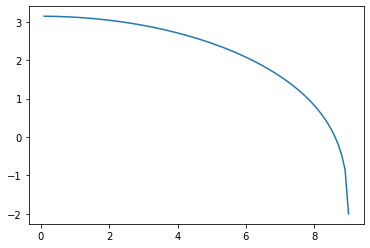

In [10]:
import matplotlib.pyplot as plt

x_values = []
y_values = []

i = step
while i < min(length_x, length_y):
  x_values.append(i)
  y_values.append(my_func(i))
  i += step

plt.plot(x_values,y_values)

In [12]:
solver = SecantMethod(my_func, min(length_x, length_y), min(length_x, length_y) - step,
                        1e-25, None, 20)

solver.iterate()

Começando o método com:
p_0 = 9
p_1 = 8.9
-------
Iteração 2
p = 8.825665864409823
f(p) = -0.5512624400659227
Variação em p = 0.07433413559017765

Iteração 3
p = 8.68976026965545
f(p) = -0.17418201531534594
Variação em p = 0.13590559475437303

Iteração 4
p = 8.626982387715262
f(p) = -0.03871886586942108
Variação em p = 0.06277788194018719

Iteração 5
p = 8.609038848085847
f(p) = -0.002974845165585993
Variação em p = 0.01794353962941564

Iteração 6
p = 8.607545472380792
f(p) = -5.2526364622940136e-05
Variação em p = 0.0014933757050545893

Iteração 7
p = 8.607518630135937
f(p) = -7.181082950502571e-08
Variação em p = 2.684224485527409e-05

Iteração 8
p = 8.607518593388624
f(p) = -1.7346124536743446e-12
Variação em p = 3.674731274827536e-08

Iteração 9
p = 8.607518593387736
f(p) = 4.440892098500626e-16
Variação em p = 8.881784197001252e-13

Iteração 10
p = 8.607518593387736
f(p) = 4.440892098500626e-16
Variação em p = 0.0

A variação em p foi menor que 1e-25

-------
p = 8.607518593387736

5)

In [ ]:
def mountain(x):
  return (31/75000)*x**3 - (47/500)*x**2 + (173/30)*x

angle = 52 * math.pi / 180
initial_speed = 41

def rocket(x):
  delta_t = (x+50) / (initial_speed * math.cos(angle))
  return (initial_speed * math.sin(angle))*delta_t - 5 * delta_t**2

In [ ]:
def my_func(x):
  return mountain(x) - rocket(x)

In [ ]:
solver = SecantMethod(my_func, 8, 8.9,
                        None, None, 8)

solver.iterate()

6)

In [ ]:
def f_x(x):
  return x*math.sin(x)

def f_x_dot(x):
  return math.sin(x) + math.cos(x)*x

In [ ]:
solver = NewtonRhaphson(f_x, f_x_dot, 0.1,
                        None, None, 200)

solver.iterate()

In [ ]:
class MAS:
  def __init__(self, f, phi, start_point, epsilon_x=1e-5, epsilon_y=None, i_max=None, print_iteration=True):
    self.f = f
    self.phi = phi
    self.epsilon_x = epsilon_x
    self.epsilon_y = epsilon_y
    self.i_max = i_max
    self.print_iteration = print_iteration

    self.p_i = start_point

    self.i = 0

  def iterate_once(self):
    last_p_i = self.p_i
    self.p_i = self.phi(self.p_i)
    self.i += 1

    x_variation = abs(self.p_i - last_p_i)
    y_error = self.f(self.p_i)
    stop_condition = (False, False)

    if self.epsilon_x:
      if x_variation < self.epsilon_x:
        stop_condition = (True, stop_condition[1])

    if self.epsilon_y:
      if y_error < self.epsilon_y:
        stop_condition = (stop_condition[0], True)


    if self.print_iteration:
      print(f'Iteração {self.i}\np = {self.p_i}\nf(p) = {y_error}\nVariação em p = {x_variation}\n')

    return stop_condition

  def iterate(self):
    print(f'Começando o método com p_0 = {self.p_i}\n-------')
    running = True
    
    while(running):
      x_condition, y_condition = self.iterate_once()

      if x_condition:
        print(f'A variação em p foi menor que {self.epsilon_x}\n')
        running = False

      if y_condition:
        print(f'O erro de f(p) foi menor que {self.epsilon_y}\n')
        running = False

      if self.i >= self.i_max:
        print(f'Excedeu o número máximo de iterações ({self.i})\n')
        running = False

    print('-------')
    print(f'p = {self.p_i}')

In [ ]:
def pol(x):
  return x**3 - 3*x**2 + 4

def phi(x):
  return (x+2)/x

In [ ]:
solver = MAS(pol, phi, 2.1,
              None, None, 25)

solver.iterate()